## Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import plotly.express as px

from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score,precision_recall_curve, auc


## Dataset Loading and EDA

In [2]:
data = pd.read_csv("/content/FALL_23 DATASET.csv")

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.info()

print(f"Number of rows in dataset : {data.shape[0]}")
print(f"Number of columns in dataset : {data.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
Number of rows in dataset : 100000
Number of columns in dataset : 9


In [5]:
import plotly.express as px

smoking_history_counts = data['smoking_history'].value_counts().reset_index()

# Rename the columns for clarity
smoking_history_counts.columns = ['Smoking History', 'Count']

# Create an interactive bar chart using Plotly Express
fig = px.bar(smoking_history_counts, x='Smoking History', y='Count',
             labels={'Smoking History': 'Smoking History', 'Count': 'Count'},
             title='Distribution of Smoking History')

# Show the plot
fig.show()


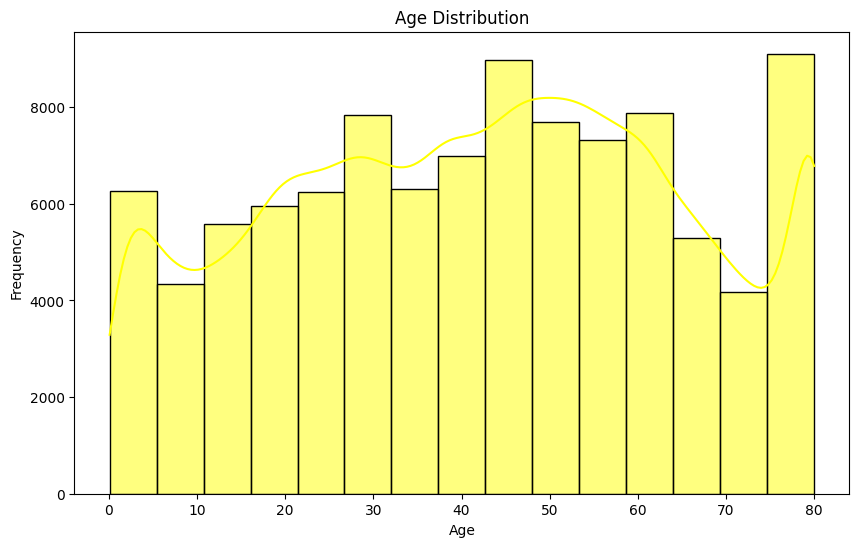

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color='yellow', bins=15)  # Using Seaborn for the histogram with KDE

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Show the plot
plt.show()

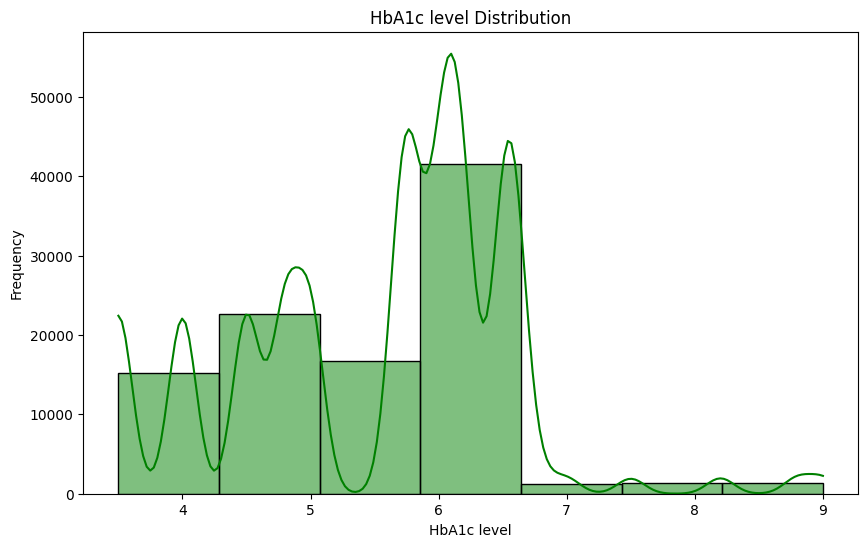

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['HbA1c_level'], kde=True, color='green', bins=7)  # Using Seaborn for the histogram with KDE

# Add labels and title
plt.xlabel('HbA1c level')
plt.ylabel('Frequency')
plt.title('HbA1c level Distribution')

# Show the plot
plt.show()

## Dataset Preprocessing

In [8]:
le = LabelEncoder()

In [9]:
data['gender'] = le.fit_transform(data['gender'])

In [10]:
data['gender']

0        0
1        0
2        1
3        0
4        1
        ..
99995    0
99996    0
99997    1
99998    0
99999    0
Name: gender, Length: 100000, dtype: int64

In [11]:
data['smoking_history'] = le.fit_transform(data['smoking_history'])

In [12]:
standard = StandardScaler()

In [13]:
data['bmi_scaled'] = standard.fit_transform(np.array(data['bmi']).reshape(-1,1))

In [14]:
data['HbA1c_level_scaled'] = standard.fit_transform(np.array(data['HbA1c_level']).reshape(-1,1))

In [15]:
data['age_scaled'] = standard.fit_transform(np.array(data['age']).reshape(-1,1))

In [16]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_scaled,HbA1c_level_scaled,age_scaled
0,0,80.0,0,1,4,25.19,6.6,140,0,-0.321056,1.001706,1.692704
1,0,54.0,0,0,0,27.32,6.6,80,0,-0.000116,1.001706,0.538006
2,1,28.0,0,0,4,27.32,5.7,158,0,-0.000116,0.161108,-0.616691
3,0,36.0,0,0,1,23.45,5.0,155,0,-0.583232,-0.492690,-0.261399
4,1,76.0,1,1,1,20.14,4.8,155,0,-1.081970,-0.679490,1.515058
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0,-0.000116,0.628107,1.692704
99996,0,2.0,0,0,0,17.37,6.5,100,0,-1.499343,0.908306,-1.771388
99997,1,66.0,0,0,3,27.83,5.7,155,0,0.076729,0.161108,1.070944
99998,0,24.0,0,0,4,35.42,4.0,100,0,1.220361,-1.426688,-0.794336


In [17]:
data['blood_glucose_level_scaled'] = standard.fit_transform(np.array(data['blood_glucose_level']).reshape(-1,1))

In [18]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_scaled,HbA1c_level_scaled,age_scaled,blood_glucose_level_scaled
0,0,80.0,0,1,4,25.19,6.6,140,0,-0.321056,1.001706,1.692704,0.047704
1,0,54.0,0,0,0,27.32,6.6,80,0,-0.000116,1.001706,0.538006,-1.426210
2,1,28.0,0,0,4,27.32,5.7,158,0,-0.000116,0.161108,-0.616691,0.489878
3,0,36.0,0,0,1,23.45,5.0,155,0,-0.583232,-0.492690,-0.261399,0.416183
4,1,76.0,1,1,1,20.14,4.8,155,0,-1.081970,-0.679490,1.515058,0.416183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0,-0.000116,0.628107,1.692704,-1.180558
99996,0,2.0,0,0,0,17.37,6.5,100,0,-1.499343,0.908306,-1.771388,-0.934905
99997,1,66.0,0,0,3,27.83,5.7,155,0,0.076729,0.161108,1.070944,0.416183
99998,0,24.0,0,0,4,35.42,4.0,100,0,1.220361,-1.426688,-0.794336,-0.934905


In [19]:
data_final = data[['age_scaled','gender','heart_disease','hypertension','smoking_history','diabetes','bmi_scaled','HbA1c_level_scaled','blood_glucose_level_scaled']]

In [20]:
data_final

,age_scaled,gender,heart_disease,hypertension,smoking_history,diabetes,bmi_scaled,HbA1c_level_scaled,blood_glucose_level_scaled
0,1.692704,0,1,0,4,0,-0.321056,1.001706,0.047704
1,0.538006,0,0,0,0,0,-0.000116,1.001706,-1.426210
2,-0.616691,1,0,0,4,0,-0.000116,0.161108,0.489878
3,-0.261399,0,0,0,1,0,-0.583232,-0.492690,0.416183
4,1.515058,1,1,1,1,0,-1.081970,-0.679490,0.416183
...,...,...,...,...,...,...,...,...,...
99995,1.692704,0,0,0,0,0,-0.000116,0.628107,-1.180558
99996,-1.771388,0,0,0,0,0,-1.499343,0.908306,-0.934905
99997,1.070944,1,0,0,3,0,0.076729,0.161108,0.416183
99998,-0.794336,0,0,0,4,0,1.220361,-1.426688,-0.934905


In [21]:
# data_final['diabetes'].unique()

## Train-test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_final.drop(columns = ['diabetes']), data_final['diabetes'], test_size= 0.3, random_state= 42, stratify= data_final['diabetes'])

In [23]:
y_train.value_counts()

0    64050
1     5950
Name: diabetes, dtype: int64

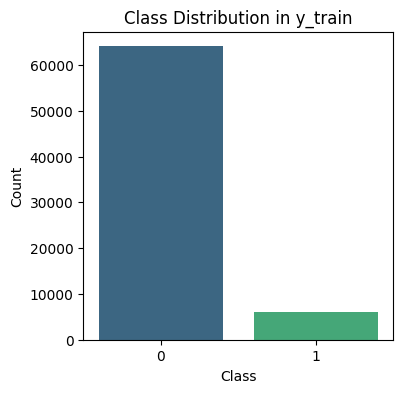

In [24]:


# Assuming 'y_train' is your target variable
# Replace it with your actual variable

# Calculate value counts for each class
class_counts = y_train.value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(4, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution in y_train')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


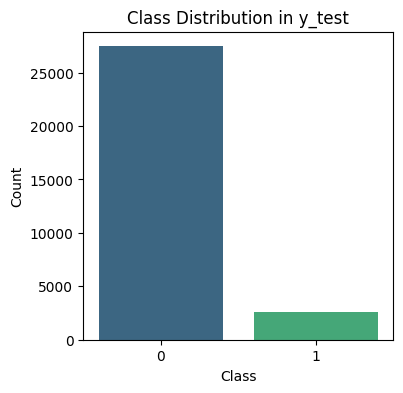

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate value counts for each class
class_counts = y_test.value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(4, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution in y_test')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [26]:
y_test.value_counts()

0    27450
1     2550
Name: diabetes, dtype: int64

## Model training and Evaluation

In [27]:
svc = SVC()

In [28]:
svc.fit(X_train,y_train)

SVC()

In [29]:
preds = svc.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test,preds)
print(f"Accuracy is {accuracy}")

Accuracy is 0.9646666666666667


In [31]:
f1 = f1_score(y_test,preds)
print(f"F1 score is {f1}")

F1 score is 0.7410845139228138


In [32]:
precision = precision_score(y_test,preds)
print(f"Precision score is {precision}")

Precision score is 0.9825129533678757


In [33]:
recall = recall_score(y_test,preds)

print(f"Recall score is {recall}")

Recall score is 0.5949019607843137


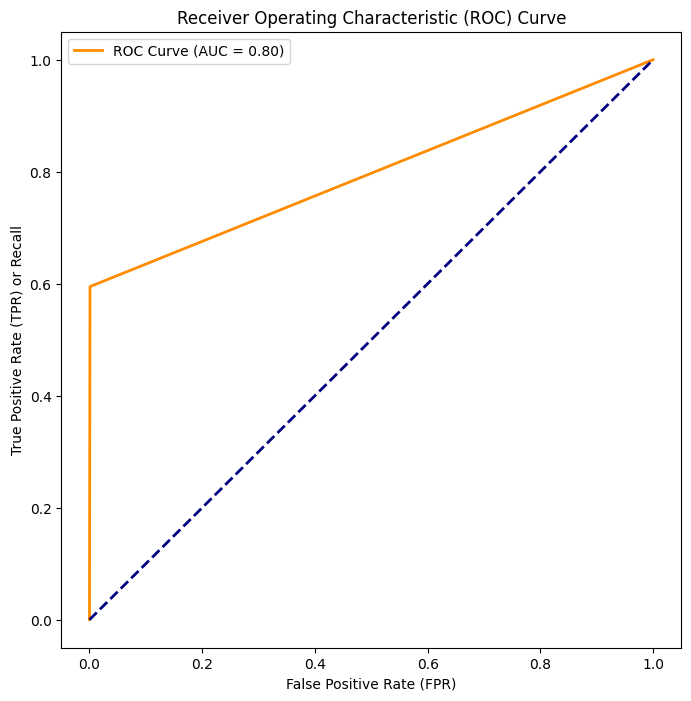

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()


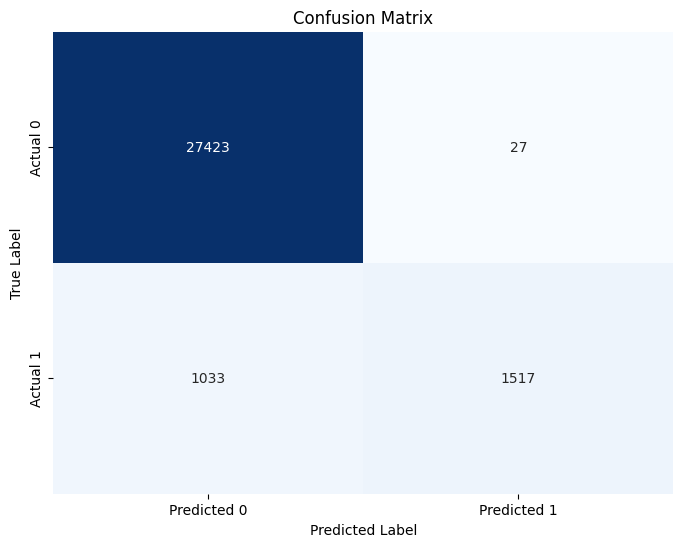

In [35]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [36]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27450
           1       0.98      0.59      0.74      2550

    accuracy                           0.96     30000
   macro avg       0.97      0.80      0.86     30000
weighted avg       0.97      0.96      0.96     30000

